In [8]:
# setup
from load_feature import load_features
from datetime import datetime
from LSTM_model import video_classification
import numpy as np
import os

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# load features for different number of frames
skipnum = 0
num_frames = 20
size = (224, 224, 3)
num_videos = 1000

# more balanced data
idx_path = os.getcwd() + '/datasets/x_train_ind_above400.npy'
Xtrain_idx = np.load(idx_path)[:num_videos]
labels = np.load(os.getcwd() + '/datasets/y_train_mapped_above400.npy')[:num_videos]

# if all videos then 
# num_videos = len(Xtrain_idx)

tic = datetime.now()
Xtrain, ytrain = load_features(num_videos, num_frames, video_idx = Xtrain_idx, \
                               labels = labels, size = size, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

processing videos...
process 64/1000
process 128/1000
process 192/1000
process 256/1000
process 320/1000
process 384/1000
process 448/1000
process 512/1000
process 576/1000
process 640/1000
process 704/1000
process 768/1000
process 832/1000
process 896/1000
process 960/1000
cache processed data...
Feature fusion time:  0:06:46.239179


  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)

In [3]:
print('Xtrain shape: ', Xtrain.shape)
print('ytrain shape: ', ytrain.shape)

Xtrain shape:  (20000, 7, 7, 512)
ytrain shape:  (1000,)


  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWarning)

  UserWa

In [29]:
np.save(os.getcwd() + '/datasets/Xtrain_lstm_1000.npy', Xtrain)
np.save(os.getcwd() + '/datasets/ytrain_lstm_1000.npy', ytrain)

In [21]:
# build up model 
num_classes = len(np.unique(ytrain))
lstm = video_classification(num_frames=20, num_classes=num_classes, dropout_rate=0.5, reg=0.1)
print('LSTM model summary: ')
print(lstm.model.summary())

building model...
LSTM model summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 20, 512)           52430848  
_________________________________________________________________
lstm_22 (LSTM)               (None, 20, 512)           2099200   
_________________________________________________________________
lstm_23 (LSTM)               (None, 20, 512)           2099200   
_________________________________________________________________
lstm_24 (LSTM)               (None, 20, 512)           2099200   
_________________________________________________________________
lstm_25 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 60,832,778
Trainable params: 60,832,778
Non-trainable params: 0
_________________________

In [22]:
lstm.train(Xtr=Xtrain, ytr=ytrain, lr = 1e-5, lr_decay = 1e-6, verbose=1, bsize=32, epochs=50)

Model is Training...
Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 15s - loss: 3.7332 - acc: 0.1450 - val_loss: 3.0953 - val_acc: 0.2600
Epoch 2/100
800/800 [==============================] - 12s - loss: 2.7954 - acc: 0.2737 - val_loss: 2.3693 - val_acc: 0.3650
Epoch 3/100
800/800 [==============================] - 12s - loss: 2.2692 - acc: 0.3275 - val_loss: 2.1373 - val_acc: 0.3300
Epoch 4/100
800/800 [==============================] - 12s - loss: 2.0089 - acc: 0.3637 - val_loss: 2.0861 - val_acc: 0.3750
Epoch 5/100
800/800 [==============================] - 12s - loss: 1.8900 - acc: 0.3825 - val_loss: 1.9117 - val_acc: 0.4250
Epoch 6/100
800/800 [==============================] - 12s - loss: 1.8201 - acc: 0.3800 - val_loss: 1.9284 - val_acc: 0.3900
Epoch 7/100
800/800 [==============================] - 12s - loss: 1.7166 - acc: 0.4163 - val_loss: 1.8850 - val_acc: 0.3950
Epoch 8/100
800/800 [==============================] - 12s

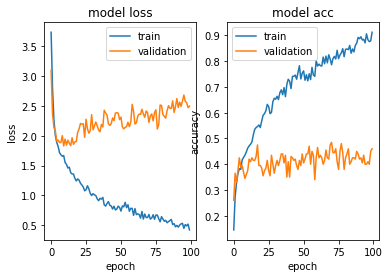

In [23]:
lstm.plot()

In [27]:
# test data loader
num_videos_test = 500
skipnum = 0
num_frames = 20
size = (224, 224, 3)
idx_path = os.getcwd() + '/datasets/x_test_ind_above400.npy'
Xtest_idx = np.load(idx_path)[:num_videos_test]
yte = np.load(os.getcwd() + '/datasets/y_test_mapped_above400.npy')[:num_videos_test]
tic = datetime.now()
Xte, yte = load_features(num_videos = num_videos_test, num_frames = num_frames, size = size, \
                             video_idx = Xtest_idx, labels = yte, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

processing videos...
process 64/500
process 128/500
process 192/500
process 256/500
process 320/500
process 384/500
process 448/500
cache processed data...
Feature fusion time:  0:03:39.207685


  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)








  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)
  UserWarning)

In [30]:
np.save(os.getcwd() + '/datasets/Xte_lstm_1000.npy', Xte)
np.save(os.getcwd() + '/datasets/yte_lstm_1000.npy', yte)

In [28]:
# test accuracy
Xte = Xte.reshape((-1, num_frames, 7*7*512))
lstm.predict(Xte, yte)

Video Classification Accuracy: 0.43


In [13]:
num_videos = 1000
skipnum = 0
num_frames = 30
size = (224, 224, 3)


tic = datetime.now()
Xtest, ytrain_1 = load_features(num_videos, num_frames, size, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum0_num_frame30.npz
Feature fusion time:  0:00:10.385741


In [14]:
num_videos = 1000
skipnum = 1000
num_frames = 30
h = 224
w = 224
c = 3

tic = datetime.now()
Xtrain_2, ytrain_2 = load_features(num_videos, num_frames, h, w, c, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum1000_num_frame30.npz
Feature fusion time:  0:00:47.317992


In [15]:
num_videos = 1000
skipnum = 2000
num_frames = 30
h = 224
w = 224
c = 3

tic = datetime.now()
Xtrain_3, ytrain_3 = load_features(num_videos, num_frames, h, w, c, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum2000_num_frame30.npz
Feature fusion time:  0:00:10.291387


In [16]:
num_videos = 1000
skipnum = 3000
num_frames = 30
h = 224
w = 224
c = 3

tic = datetime.now()
Xtrain_4, ytrain_4 = load_features(num_videos, num_frames, h, w, c, skip_num=skipnum)
toc = datetime.now()
print('Feature fusion time: ', toc-tic)

find matched cache file /home/sunjiajun/cs231n_project/datasets/cache/num_videos1000_skipnum3000_num_frame30.npz
Feature fusion time:  0:00:11.380633
